## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   5.717568   882.241063  0.659682  10.659912   582.019432
1  63.591134   970.077397  0.469703   1.120316   460.055071
2  23.971946  1454.344543  0.698169   4.006313  1015.734201
3   8.449091  1314.375790  0.749522   5.957547   985.216255
4  50.790170   745.589250  0.354638  10.659230   269.457293


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9885078	total: 56.4ms	remaining: 56.4s
1:	learn: 0.9777005	total: 56.8ms	remaining: 28.4s
2:	learn: 0.9684943	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9584187	total: 58.1ms	remaining: 14.5s
4:	learn: 0.9444462	total: 58.5ms	remaining: 11.6s
5:	learn: 0.9342019	total: 59ms	remaining: 9.78s
6:	learn: 0.9243941	total: 59.5ms	remaining: 8.44s
7:	learn: 0.9119109	total: 60.1ms	remaining: 7.46s
8:	learn: 0.9022817	total: 60.5ms	remaining: 6.66s
9:	learn: 0.8908413	total: 61ms	remaining: 6.04s
10:	learn: 0.8816104	total: 61.4ms	remaining: 5.52s
11:	learn: 0.8692103	total: 61.9ms	remaining: 5.09s
12:	learn: 0.8574774	total: 62.2ms	remaining: 4.72s
13:	learn: 0.8462262	total: 62.6ms	remaining: 4.41s
14:	learn: 0.8371372	total: 63ms	remaining: 4.14s
15:	learn: 0.8284037	total: 63.5ms	remaining: 3.9s
16:	learn: 0.8179665	total: 64.3ms	remaining: 3.72s
17:	learn: 0.8088520	total: 64.8ms	remaining: 3.54s
18:	learn: 0.8016622	total: 65.4ms	remaining: 3.38s

113:	learn: 0.3086129	total: 108ms	remaining: 836ms
114:	learn: 0.3063654	total: 108ms	remaining: 834ms
115:	learn: 0.3032834	total: 109ms	remaining: 830ms
116:	learn: 0.3012216	total: 109ms	remaining: 824ms
117:	learn: 0.2981527	total: 110ms	remaining: 819ms
118:	learn: 0.2955499	total: 110ms	remaining: 815ms
119:	learn: 0.2930699	total: 111ms	remaining: 810ms
120:	learn: 0.2911390	total: 111ms	remaining: 806ms
121:	learn: 0.2879236	total: 111ms	remaining: 801ms
122:	learn: 0.2863349	total: 112ms	remaining: 798ms
123:	learn: 0.2832001	total: 112ms	remaining: 794ms
124:	learn: 0.2809958	total: 113ms	remaining: 791ms
125:	learn: 0.2784080	total: 114ms	remaining: 788ms
126:	learn: 0.2764898	total: 114ms	remaining: 784ms
127:	learn: 0.2743748	total: 115ms	remaining: 780ms
128:	learn: 0.2722982	total: 115ms	remaining: 776ms
129:	learn: 0.2704183	total: 116ms	remaining: 774ms
130:	learn: 0.2683550	total: 116ms	remaining: 771ms
131:	learn: 0.2660086	total: 117ms	remaining: 768ms
132:	learn: 

282:	learn: 0.0955124	total: 185ms	remaining: 468ms
283:	learn: 0.0949861	total: 185ms	remaining: 468ms
284:	learn: 0.0942873	total: 186ms	remaining: 466ms
285:	learn: 0.0936270	total: 186ms	remaining: 465ms
286:	learn: 0.0932282	total: 187ms	remaining: 464ms
287:	learn: 0.0926982	total: 187ms	remaining: 462ms
288:	learn: 0.0919751	total: 187ms	remaining: 461ms
289:	learn: 0.0915899	total: 188ms	remaining: 459ms
290:	learn: 0.0911947	total: 188ms	remaining: 458ms
291:	learn: 0.0908417	total: 188ms	remaining: 457ms
292:	learn: 0.0902575	total: 189ms	remaining: 456ms
293:	learn: 0.0898692	total: 189ms	remaining: 454ms
294:	learn: 0.0894979	total: 190ms	remaining: 453ms
295:	learn: 0.0890843	total: 190ms	remaining: 452ms
296:	learn: 0.0886373	total: 190ms	remaining: 451ms
297:	learn: 0.0882344	total: 191ms	remaining: 449ms
298:	learn: 0.0876868	total: 191ms	remaining: 448ms
299:	learn: 0.0872800	total: 192ms	remaining: 447ms
300:	learn: 0.0867746	total: 192ms	remaining: 446ms
301:	learn: 

539:	learn: 0.0275356	total: 286ms	remaining: 244ms
540:	learn: 0.0273823	total: 287ms	remaining: 243ms
541:	learn: 0.0272688	total: 287ms	remaining: 243ms
542:	learn: 0.0271188	total: 288ms	remaining: 242ms
543:	learn: 0.0269674	total: 288ms	remaining: 241ms
544:	learn: 0.0268247	total: 288ms	remaining: 241ms
545:	learn: 0.0267620	total: 289ms	remaining: 240ms
546:	learn: 0.0266468	total: 289ms	remaining: 239ms
547:	learn: 0.0265850	total: 290ms	remaining: 239ms
548:	learn: 0.0264719	total: 290ms	remaining: 238ms
549:	learn: 0.0263739	total: 290ms	remaining: 238ms
550:	learn: 0.0262326	total: 291ms	remaining: 237ms
551:	learn: 0.0260962	total: 291ms	remaining: 236ms
552:	learn: 0.0259872	total: 292ms	remaining: 236ms
553:	learn: 0.0258543	total: 292ms	remaining: 235ms
554:	learn: 0.0257950	total: 292ms	remaining: 234ms
555:	learn: 0.0256884	total: 293ms	remaining: 234ms
556:	learn: 0.0256301	total: 293ms	remaining: 233ms
557:	learn: 0.0255253	total: 294ms	remaining: 233ms
558:	learn: 

722:	learn: 0.0131885	total: 364ms	remaining: 139ms
723:	learn: 0.0131468	total: 364ms	remaining: 139ms
724:	learn: 0.0131058	total: 365ms	remaining: 138ms
725:	learn: 0.0130377	total: 365ms	remaining: 138ms
726:	learn: 0.0129988	total: 365ms	remaining: 137ms
727:	learn: 0.0129785	total: 366ms	remaining: 137ms
728:	learn: 0.0128998	total: 366ms	remaining: 136ms
729:	learn: 0.0128250	total: 367ms	remaining: 136ms
730:	learn: 0.0127484	total: 367ms	remaining: 135ms
731:	learn: 0.0127059	total: 368ms	remaining: 135ms
732:	learn: 0.0126452	total: 368ms	remaining: 134ms
733:	learn: 0.0125884	total: 368ms	remaining: 134ms
734:	learn: 0.0125293	total: 369ms	remaining: 133ms
735:	learn: 0.0124918	total: 370ms	remaining: 133ms
736:	learn: 0.0124177	total: 370ms	remaining: 132ms
737:	learn: 0.0123714	total: 370ms	remaining: 131ms
738:	learn: 0.0123169	total: 371ms	remaining: 131ms
739:	learn: 0.0122718	total: 371ms	remaining: 130ms
740:	learn: 0.0122400	total: 372ms	remaining: 130ms
741:	learn: 

962:	learn: 0.0067952	total: 468ms	remaining: 18ms
963:	learn: 0.0067727	total: 469ms	remaining: 17.5ms
964:	learn: 0.0067526	total: 469ms	remaining: 17ms
965:	learn: 0.0067348	total: 469ms	remaining: 16.5ms
966:	learn: 0.0067156	total: 470ms	remaining: 16ms
967:	learn: 0.0067127	total: 470ms	remaining: 15.5ms
968:	learn: 0.0066916	total: 470ms	remaining: 15.1ms
969:	learn: 0.0066696	total: 471ms	remaining: 14.6ms
970:	learn: 0.0066521	total: 471ms	remaining: 14.1ms
971:	learn: 0.0066333	total: 472ms	remaining: 13.6ms
972:	learn: 0.0066304	total: 472ms	remaining: 13.1ms
973:	learn: 0.0066131	total: 473ms	remaining: 12.6ms
974:	learn: 0.0065871	total: 473ms	remaining: 12.1ms
975:	learn: 0.0065843	total: 473ms	remaining: 11.6ms
976:	learn: 0.0065815	total: 474ms	remaining: 11.2ms
977:	learn: 0.0065625	total: 474ms	remaining: 10.7ms
978:	learn: 0.0065421	total: 475ms	remaining: 10.2ms
979:	learn: 0.0065081	total: 475ms	remaining: 9.7ms
980:	learn: 0.0064912	total: 476ms	remaining: 9.22ms


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

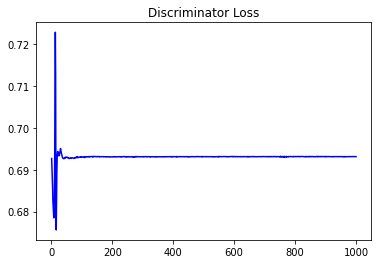

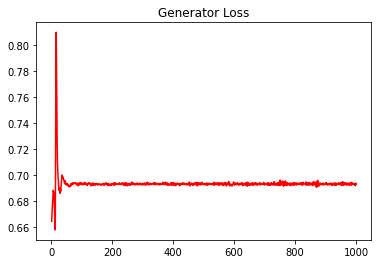

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02615933574365019


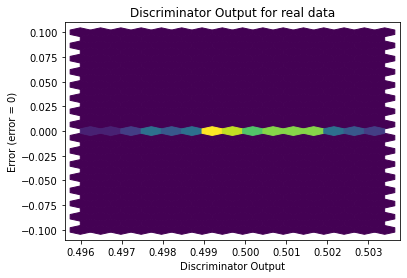

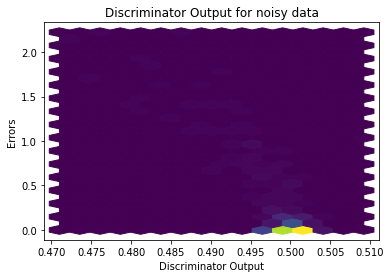

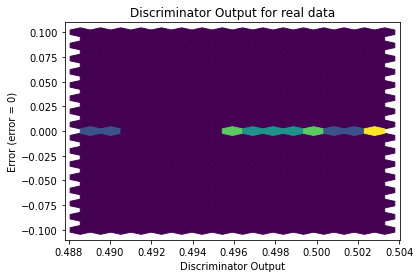

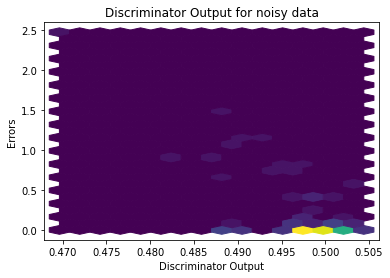

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


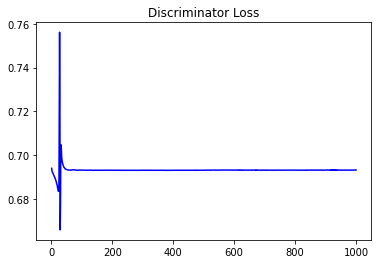

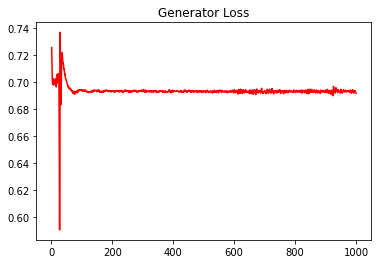

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.037870843611566174


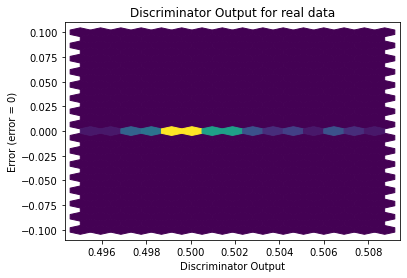

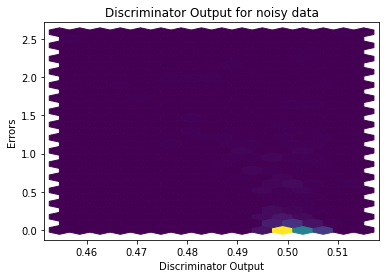

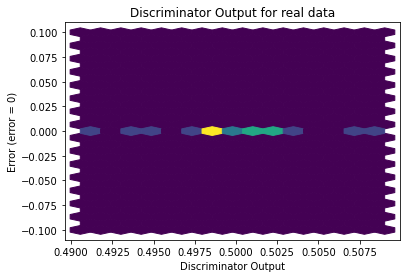

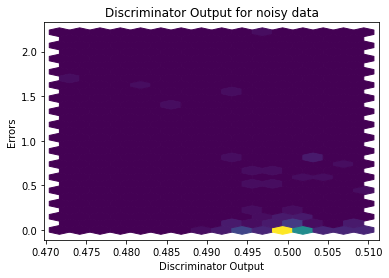

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0314]], requires_grad=True)
